In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import sklearn

In [58]:
## Make data for y = sin(x) function

x = np.random.uniform(0, 2 * np.pi, 1000)

y = np.sin(x)


df = pd.DataFrame({'x': x, 'y': y})

#df = df.sample(frac=1).reset_index(drop=True)

# Save the DataFrame to a CSV file
df.to_csv('./sinx_test1.csv', index=False)

In [31]:
# Make data for y = A*sin(x) + B*noise

x = np.random.uniform(0, 10 * np.pi, 50000)

A = np.sqrt(0.0002)

B = np.sqrt(0.0055)

y = A * np.sin(x) + B * np.random.normal(0, 1, 50000)

# Create a DataFrame with x and y
df = pd.DataFrame({'x': x, 'y': y})

#Add new features of x to the DataFrame
# rolling standard deviation window of size 20
df['x_std20'] = df['x'].rolling(20).std()

# rolling standard deviation window of size 10
df['x_std50'] = df['x'].rolling(10).std()

# rolling standard deviation window of size 5
df['x_std5'] = df['x'].rolling(5).std()

# rolling variance window of size 20
df['x_var20'] = df['x'].rolling(20).var()

# rolling skewness window of size 20
df['x_skew20'] = df['x'].rolling(20).skew()

# rolling skewness window of size 10
df['x_skew50'] = df['x'].rolling(10).skew()

#  rolling skewness window of size 5
df['x_skew100'] = df['x'].rolling(5).skew()

# rolling kurtosis window of size 20
df['x_kurt20'] = df['x'].rolling(20).kurt()

# rolling kurtosis window of size 5
df['x_kurt5'] = df['x'].rolling(5).kurt()

# rolling kurtosis window of size 10
df['x_kurt10'] = df['x'].rolling(10).kurt()

# rolling mean window of size 20
df['x_mean20'] = df['x'].rolling(20).mean()

# rolling mean window of size 10
df['x_mean10'] = df['x'].rolling(10).mean()

# rolling mean window of size 5
df['x_mean5'] = df['x'].rolling(5).mean()

# rolling median window of size 10
df['x_median20'] = df['x'].rolling(10).median()

# trend of x from rolling mean of size 20
df['x_trend20'] = df['x'].rolling(20).mean().diff()

# trend of x from rolling mean of size 50
df['x_trend50'] = df['x'].rolling(10).mean().diff()

# detrended x from rolling mean of size 20
df['x_detrend20'] = df['x'] - df['x'].rolling(20).mean()

# detrended x from rolling mean of size 10
df['x_detrend50'] = df['x'] - df['x'].rolling(10).mean()


df = df.dropna() #drop the rows with NaN values

# Save the DataFrame to a CSV file"
df.to_csv('./sinx_train_features.csv', index=False)

In [32]:
#check if there is nan value
df.isnull().sum()

x              0
y              0
x_std20        0
x_std50        0
x_std5         0
x_var20        0
x_skew20       0
x_skew50       0
x_skew100      0
x_kurt20       0
x_kurt5        0
x_kurt10       0
x_mean20       0
x_mean10       0
x_mean5        0
x_median20     0
x_trend20      0
x_trend50      0
x_detrend20    0
x_detrend50    0
dtype: int64

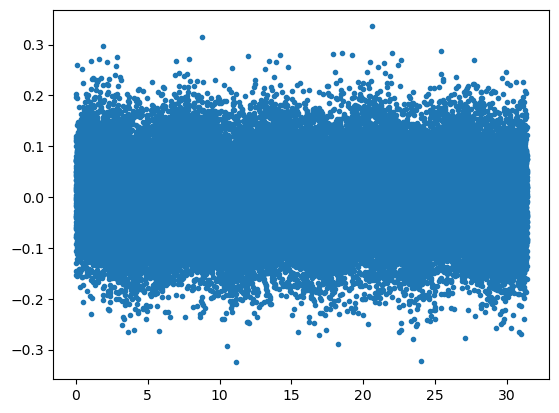

In [33]:
plt.plot(x,y,'.')

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.model_selection import KFold

In [11]:
# Separate the input features (X) and target variable (y)
X = df.drop(columns=['y'])
y = df['y']

# Create a RandomForestRegressor object
estimator = RandomForestRegressor(n_estimators=50, random_state=42)

# Create an RFECV object with a RandomForestRegressor and 5-fold cross-validation
feature_selector = RFECV(estimator, step=1, cv=KFold(3), scoring='neg_mean_squared_error')

# Fit the feature selector to your data
feature_selector.fit(X, y)

# Print the optimal number of features and their names
optimal_num_features = feature_selector.n_features_
selected_features = X.columns[feature_selector.support_]

print(f"Optimal number of features: {optimal_num_features}")
print("Selected features:", selected_features)

KeyboardInterrupt: 